In [1]:
from FinancialMachineLearning.features.microstructure import *
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
os.chdir('..')
os.chdir('..')
os.getcwd()

'/Users/junghunlee/Desktop/Pycharm/FinancialMachineLearning'

In [3]:
data = pd.read_csv('./Data/IVEfuture.csv')

#### Tick rule

In [4]:
aggressor = tick_rule(data['price'])
aggressor

0           1.0
1          -1.0
2           1.0
3           1.0
4           1.0
           ... 
10930208   -1.0
10930209   -1.0
10930210    1.0
10930211    1.0
10930212   -1.0
Length: 10930213, dtype: float64

#### The Roll Model

In [6]:
data

,Date,time,price,bid,ask,volume
0,09/28/2009,09:30:00,50.79,50.70,50.79,100
1,09/28/2009,09:30:00,50.71,50.70,50.79,638
2,09/28/2009,09:31:32,50.75,50.75,50.76,100
3,09/28/2009,09:31:32,50.75,50.75,50.76,100
4,09/28/2009,09:31:33,50.75,50.75,50.76,100
...,...,...,...,...,...,...
10930208,09/14/2023,15:59:59,162.98,162.97,163.00,100
10930209,09/14/2023,15:59:59,162.97,162.97,163.00,471
10930210,09/14/2023,15:59:59,163.00,162.97,163.00,200
10930211,09/14/2023,15:59:59,163.00,162.98,163.00,135


In [5]:
roll = RollModel(close_prices = data['price'], window = 20)

In [7]:
measure = roll.roll_measure()
measure

0                NaN
1                NaN
2                NaN
3                NaN
4                NaN
              ...   
10930208    0.010260
10930209    0.010563
10930210    0.012978
10930211    0.012978
10930212    0.012978
Name: price, Length: 10930213, dtype: float64

Text(0.5, 1.0, 'Roll Model Measure')

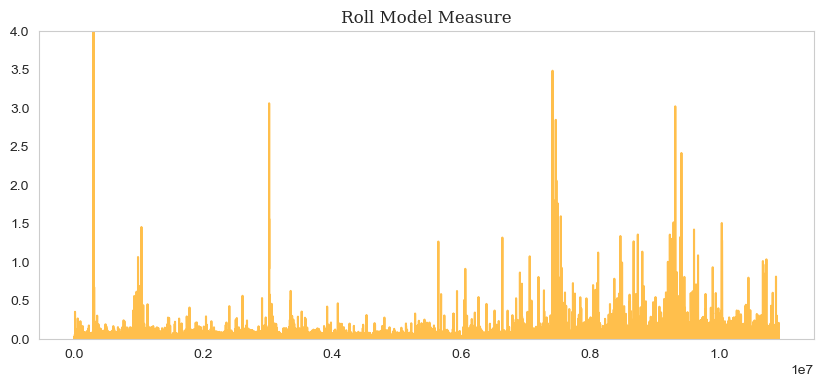

In [23]:
measure.plot(grid = False, figsize = (10,4), alpha = 0.7, color = 'orange')
plt.ylim([0,4])
plt.title('Roll Model Measure', fontsize = 12, fontfamily = 'Serif')

In [15]:
impact = roll.roll_impact(data['volume'] * data['price'])
impact

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                ...     
10930208    6.295118e-07
10930209    1.376140e-07
10930210    3.980894e-07
10930211    5.897620e-07
10930212    2.540032e-09
Length: 10930213, dtype: float64

Text(0.5, 1.0, 'Roll Model Impact')

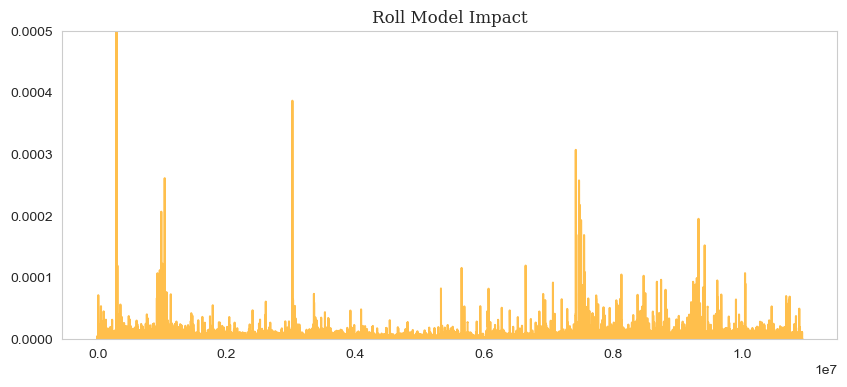

In [22]:
impact.plot(grid = False, figsize = (10,4), alpha = 0.7, color = 'orange')
plt.ylim([0,0.0005])
plt.title('Roll Model Impact', fontsize = 12, fontfamily = 'Serif')

#### Corwin Schultz

In [33]:
dollar = pd.read_csv('./Data/dollar_IVEfuture.csv')

In [34]:
corwin_schultz = CorwinSchultz(dollar['high'], dollar['low'])

In [35]:
spread = corwin_schultz.corwin_schultz_estimator(window = 20)
spread

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
            ...   
226209    0.001171
226210    0.000698
226211    0.000856
226212    0.001435
226213    0.002154
Name: Spread, Length: 226214, dtype: float64

Text(0.5, 1.0, 'Estimated Corwin Schultz Spread Volatility')

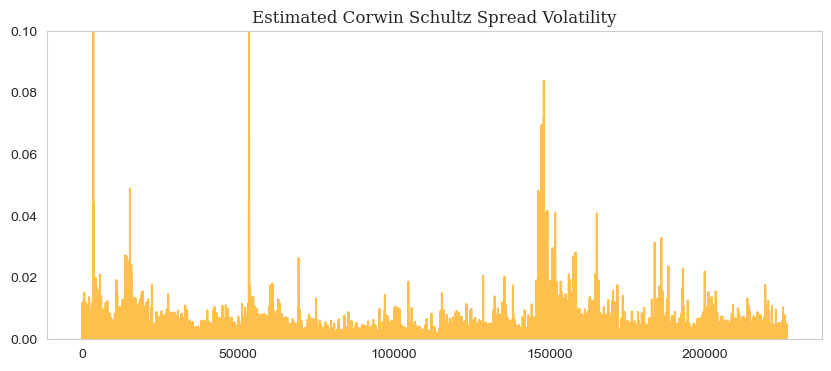

In [36]:
plt.figure(figsize = (10,4))
spread.plot(grid = False, alpha = 0.7, color = 'orange')
plt.ylim([0, 0.1])
plt.title('Estimated Corwin Schultz Spread Volatility', fontsize = 12, fontfamily = 'Serif')

#### Becker Parkinson Volatility

In [38]:
vol = corwin_schultz.becker_parkinson_vol(window = 20)
vol.dropna()

20        0.000000
21        0.000578
22        0.000676
23        0.002373
24        0.001539
            ...   
226209    0.000000
226210    0.000044
226211    0.000000
226212    0.000000
226213    0.000000
Length: 226194, dtype: float64

Text(0.5, 1.0, 'Estimated Backer Parkinson Volatility')

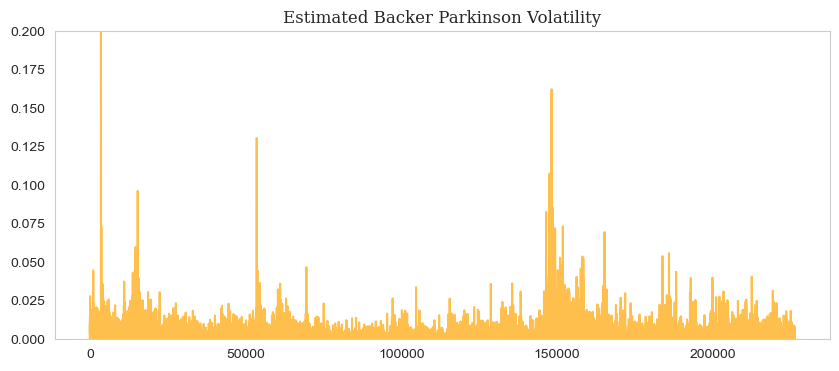

In [40]:
plt.figure(figsize = (10,4))
plt.plot(vol, alpha = 0.7, color = 'orange')
plt.grid(False)
plt.ylim([0, 0.2])
plt.title('Estimated Backer Parkinson Volatility', fontsize = 12, fontfamily = 'Serif')

#### Kyle's Lambda

In [41]:
lambda_feature = BarbasedLambda(close = data['price'],
                                volume = data['volume'],
                                dollar_volume = data.price * data.volume)

In [43]:
kyle_lambda = lambda_feature.kyle()
kyle_lambda.dropna()

20          0.000055
21          0.000049
22          0.000034
23          0.000039
24          0.000039
              ...   
10930208    0.000038
10930209    0.000039
10930210    0.000047
10930211    0.000047
10930212    0.000037
Length: 10898915, dtype: float64

Text(0.5, 1.0, "Kyle's $\\lambda$")

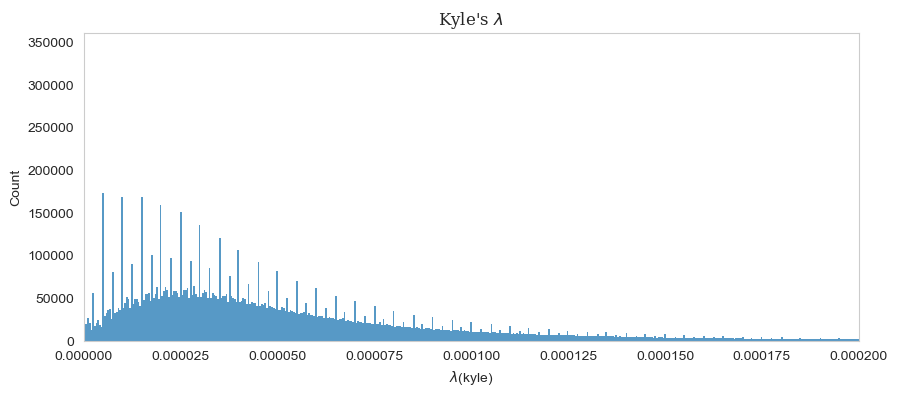

In [47]:
import seaborn as sns
#fig , ax = plt.subplots(figsize = (10, 4))
#sns.histplot(kyle_lambda, ax = ax)
#plt.grid(False)
#plt.xlim([0, 0.0002])
#plt.xlabel(r"$\lambda$(kyle)")
#plt.title(r"Kyle's $\lambda$", fontsize = 12, fontfamily = 'Serif')

#### Amihud's Lambda

In [49]:
amihud_lambda = lambda_feature.amihud()
amihud_lambda

0                    NaN
1                    NaN
2                    NaN
3                    NaN
4                    NaN
                ...     
10930208    1.436493e-09
10930209    1.476461e-09
10930210    1.758771e-09
10930211    1.758771e-09
10930212    1.384125e-09
Length: 10930213, dtype: float64

In [ ]:
#fig , ax = plt.subplots(figsize = (10, 4))
#sns.histplot(amihud_lambda, ax = ax)
#plt.xlabel(r"$\lambda$(amihud)")
#plt.grid(False)
#plt.xlim([0,0.0000004])
#plt.title(r"Amihud's $\lambda$", fontsize = 12, fontfamily = 'Serif')

#### Hasbrouck's Lambda

In [22]:
hasbrouck_lambda = lambda_feature.hasbrouck()
hasbrouck_lambda

0                NaN
1          -0.000008
2           0.000000
3           0.000001
4           0.000015
              ...   
10930208         NaN
10930209         NaN
10930210         NaN
10930211         NaN
10930212         NaN
Length: 10930213, dtype: float64

Text(0.5, 1.0, "Hasbrouck's $\\lambda$")

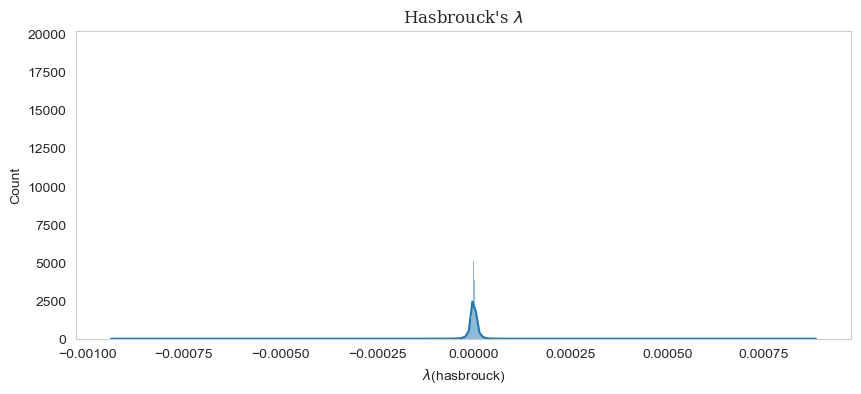

In [23]:
#fig , ax = plt.subplots(figsize = (10, 4))
#sns.histplot(hasbrouck_lambda, kde = True, ax = ax)
#plt.xlabel(r"$\lambda$(hasbrouck)")
#plt.grid(False)
#plt.title(r"Hasbrouck's $\lambda$", fontsize = 12, fontfamily = 'Serif')

#### Third Generation : Sequential Trade Models

**VPIN**

In [25]:
from FinancialMachineLearning.barsampling.standard_bar import volumeBar

def buy_volume(df):
    tick_signs = TickRule(df['price'])
    return (df['volume'] * (tick_signs > 0)).sum()
def sell_volume(df):
    tick_signs = TickRule(df['price'])
    return (df['volume'] * (tick_signs < 0)).sum()

In [27]:
from FinancialMachineLearning.barsampling.bar_feature import BarFeature
buy_volume_feature = BarFeature(name = 'buy_volume', function = buy_volume)
sell_volume_feature = BarFeature(name = 'sell_volume', function = sell_volume)

In [28]:
bars = volumeBar('./Data/maks_tick_data.csv', 
                 additional_features = [buy_volume_feature, sell_volume_feature])
vol_thres = 10000
vpin_series = vpin(bars['buy_volume'], bars['sell_volume'], vol_thres, 5)

Reading data in batches:
Batch number: 0
Returning bars 


Text(0.5, 1.0, 'VPIN model & Dollar Value Bar')

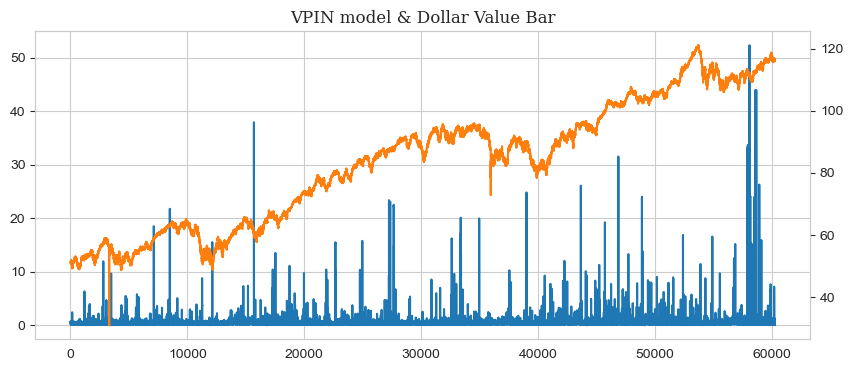

In [29]:
plt.figure(figsize=(10, 4))
vpin_series.plot()
bars['close'].plot(secondary_y = True)
plt.title('VPIN model & Dollar Value Bar', fontsize = 12, fontfamily = 'Serif')

Text(0.5, 1.0, 'VPIN model & Dollar Value Bar')

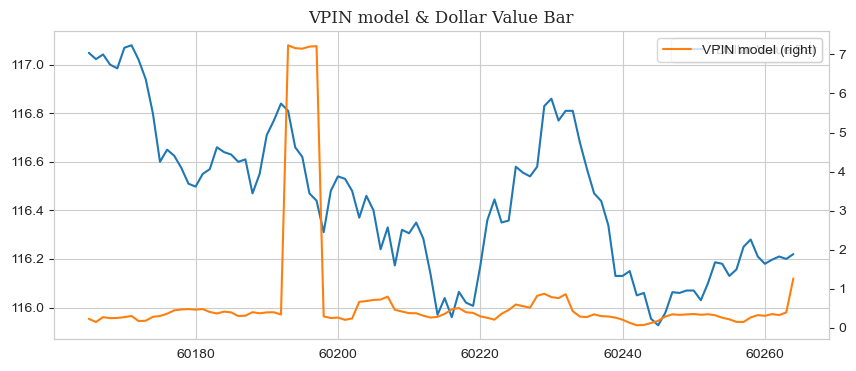

In [32]:
plt.figure(figsize=(10, 4))
bars['close'][-100:].plot(label = 'Dollar Value Bar')
plt.legend()
vpin_series[-100:].plot(label = 'VPIN model', secondary_y = True)
plt.legend()
plt.title('VPIN model & Dollar Value Bar', fontsize = 12, fontfamily = 'Serif')